# Capstone 2 EDA

Having wrangled a codon frequency data set and incorporated a dictionary linking amino acids to the codons that encode them, I'm ready to proceed to do some EDA.  First, I'm going to need several modules for this:

In [25]:
# the usual modules and their aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# restore the codon usage dataframe from the previous data wrangling notebook
codon_usage = pd.read_csv('codon_usage2.csv')

# these could prove useful later:
codon_list = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']

amino_list = ['alanine', 'arginine',
       'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid',
       'glycine', 'histidine', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'start', 'stop']

# might strip 'start' and 'stop' from the above list but let's leave it for now

# this dictionary, from the preceding notebook, could also prove quite useful
amino_codons = {'alanine': ['GCU', 'GCC', 'GCA', 'GCG'], 
                'arginine': ['CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
                'asparagine': ['AAU', 'AAC'],
                'aspartic acid': ['GAU', 'GAC'],
                'cysteine': ['UGU', 'UGC'], 
                'glutamine': ['CAA', 'CAG'],
                'glutamic acid': ['GAA', 'GAG'],
                'glycine': ['GGU', 'GGC', 'GGA', 'GGG'],
                'histidine': ['CAU', 'CAC'], 
                'isoleucine': ['AUU', 'AUC', 'AUA'], 
                'leucine': ['CUU', 'CUC', 'CUA', 'CUG', 'UUA', 'UUG'],
                'lysine': ['AAA', 'AAG'], 
                'methionine': ['AUG'], 
                'phenylalanine': ['UUU', 'UUC'], 
                'proline': ['CCU', 'CCC', 'CCA', 'CCG'],
                'serine': ['UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC'], 
                'threonine': ['ACU', 'ACC', 'ACA', 'ACG'], 
                'tryptophan': ['UGG'],
                'tyrosine': ['UAU', 'UAC'], 
                'valine': ['GUU', 'GUC', 'GUA', 'GUG'], 
                'start': ['AUG'], 
                'stop': ['UAA', 'UAG', 'UGA']}



In [26]:
# examine the codon usage dataframe
print(codon_usage.columns)
print(codon_usage.shape)

Index(['Unnamed: 0', 'Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons',
       'SpeciesName', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA', 'alanine', 'arginine',
       'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid',
       'glycine', 'histidine', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'start', 'stop'],
      dtype='object')
(13028, 92)


In [5]:
codon_usage.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,start,stop
0,0,virus,genomic,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,...,0.02506,0.02857,0.07268,0.06115,0.04561,0.01003,0.02757,0.09423,0.02506,0.00301
1,1,virus,genomic,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,...,0.03324,0.04071,0.05020,0.06581,0.05768,0.01425,0.03392,0.08955,0.03324,0.00339
2,2,virus,genomic,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,...,0.02180,0.04154,0.06232,0.08289,0.05491,0.01728,0.03887,0.05780,0.02180,0.00535
3,3,virus,genomic,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,...,0.02924,0.04020,0.03760,0.09191,0.06215,0.01201,0.03029,0.07885,0.02924,0.00418
4,4,virus,genomic,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,...,0.02773,0.04187,0.02798,0.06893,0.06745,0.01205,0.03456,0.07196,0.02773,0.00175


This is to all appearances the same dataframe that was wrangled in the preceding notebook.

One interesting thing that might be explored is the distribution of these amino acids across the entire dataframe.

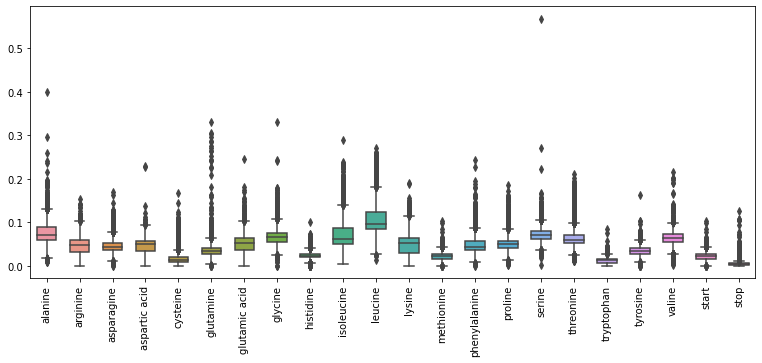

In [6]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(data=codon_usage[amino_list], width=0.6)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Clearly, the amino acids have quite different distributions.  It's worth noting that all of them have a pronounced right skew; this isn't unexpected.  But some of the outliers are quite surprising.  There are some organisms represented in these data with shockingly high proportions of their codons representing one specific amino acid - there's one for which over 50% of codons are for serine, for instance.  I wonder what that is?

In [6]:
print(codon_usage['SpeciesName'].loc[codon_usage['serine'] == codon_usage['serine'].max()], codon_usage['serine'].max())

8734    Phragmatopoma californica
Name: SpeciesName, dtype: object 0.5677399999999999


Well, that's interesting.  It's a marine polychaete worm.  https://en.wikipedia.org/wiki/Phragmatopoma_californica

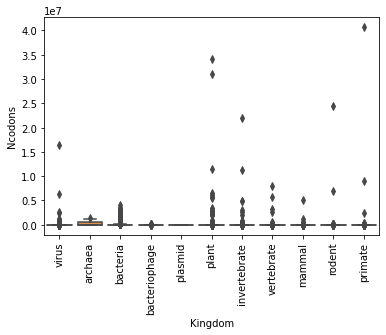

In [7]:
# let's examine the distributions for the most general factor: number of codons.

ax = sns.boxplot(data=codon_usage, x='Kingdom', y='Ncodons')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

That's not particularly informative - a handful of very extreme outliers makes the range of the boxplots so extreme that the central features can't be observed.  This can be cured by taking logarithms.  (Of course this also may need to be done for subsequent procedures, so I'll just incorporate it into the dataframe.)

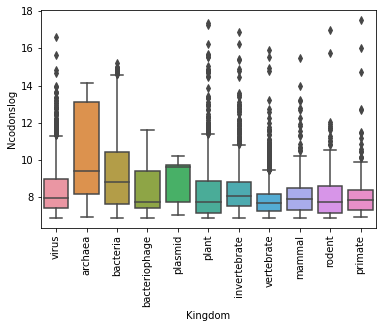

In [9]:
codon_usage['Ncodonslog'] = np.log(codon_usage['Ncodons'])
ax = sns.boxplot(data=codon_usage, x='Kingdom', y='Ncodonslog')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

The log transformation shows that there is indeed a great deal of diversity in number of codons among the levels of the 'Kingdom' variable.  Let's examine the distribution with respect to 'DNAtype':

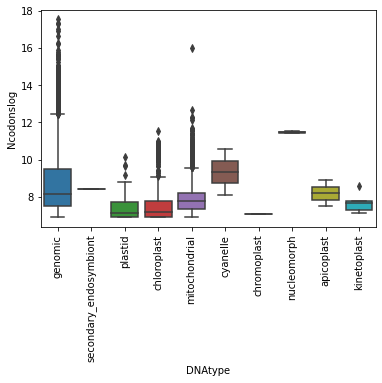

In [10]:
ax = sns.boxplot(data=codon_usage, x='DNAtype', y='Ncodonslog')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

These boxplots look a little odd, some of them are entirely collapsed.  Let's examine the value counts for 'DNAtype':

In [13]:
codon_usage['DNAtype'].value_counts()

genomic                   9267
mitochondrial             2899
chloroplast                816
plastid                     31
kinetoplast                  5
nucleomorph                  2
cyanelle                     2
apicoplast                   2
chromoplast                  1
secondary_endosymbiont       1
Name: DNAtype, dtype: int64

Several of these categories have so few members that there's no distribution to speak of.  It will probably be useful to exclude these handful of observations from any models developed.

<AxesSubplot:>

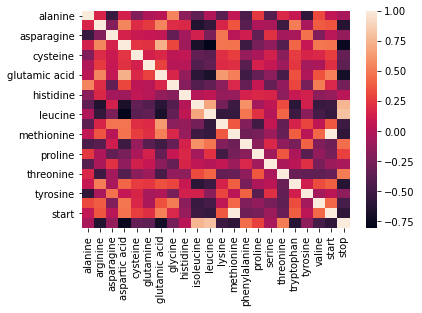

In [28]:
ams = codon_usage[amino_list]
sns.heatmap(ams.corr())

What's worth noting here?  One prominent feature is the high correlation between methionine and the start codon, which is unsurprising, as the start codon codes for methionine.  Another interesting point is the moderately strong correlation between isoleucine and leucine, which are (as the names suggest) isomers.  Both of them have a strong correlation with the stop codon - does this suggest that they are more common among shorter genes?

<AxesSubplot:>

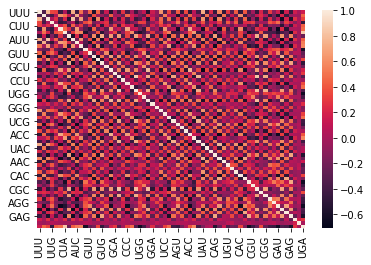

In [27]:
cds = codon_usage[codon_list]
sns.heatmap(cds.corr())

There are simply too many levels for this heatmap to be terribly informative.  We can observe from the 'checkering' that there are indeed associations among these codon frequencies, but it's difficult to specify just what they are at this level of generality.  Let's look at amino frequencies by kingdom, exhaustively.

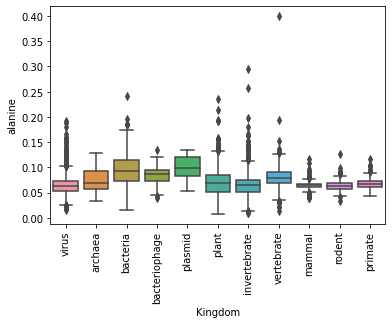

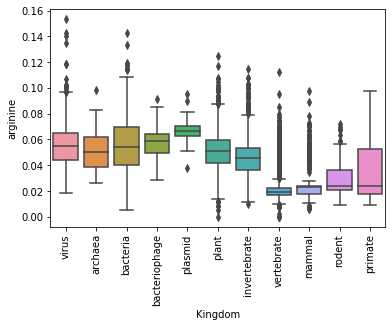

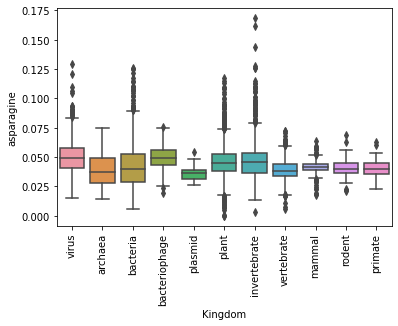

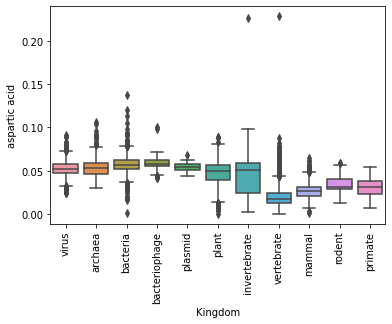

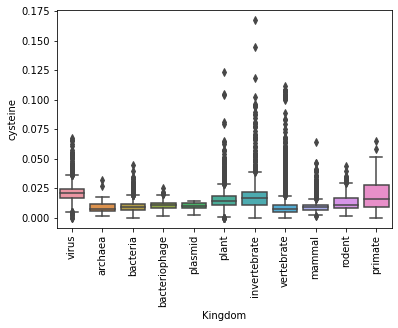

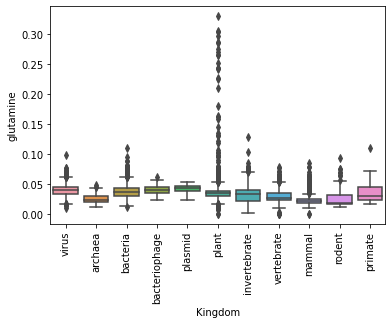

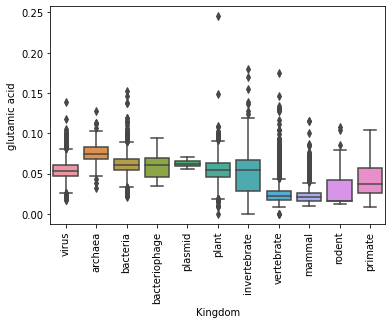

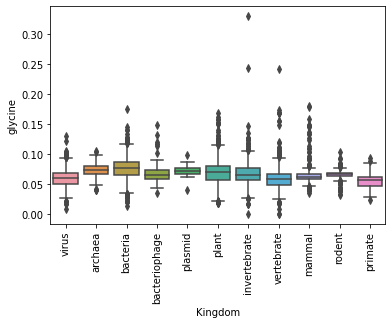

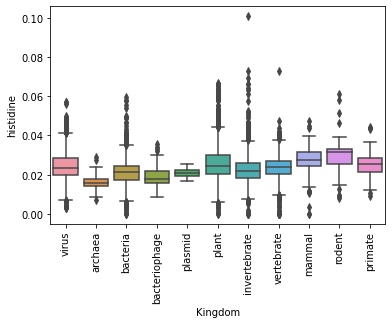

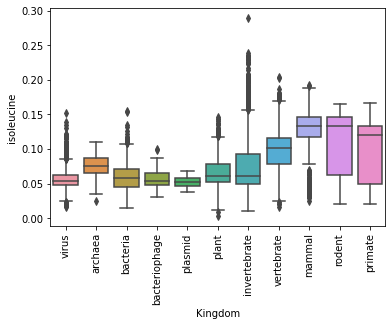

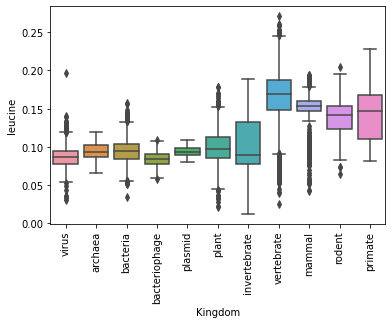

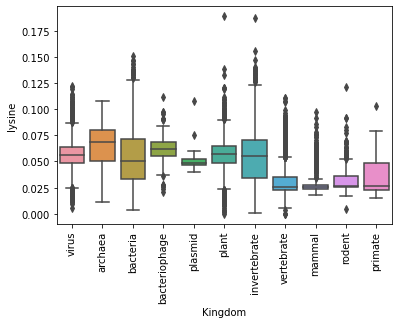

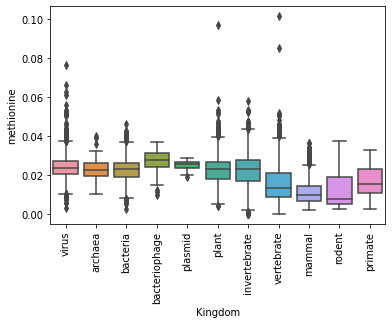

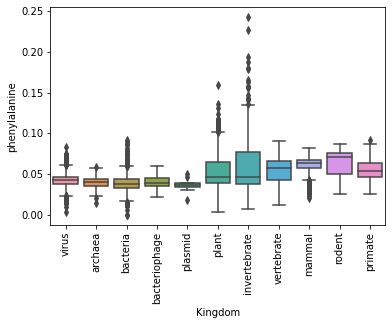

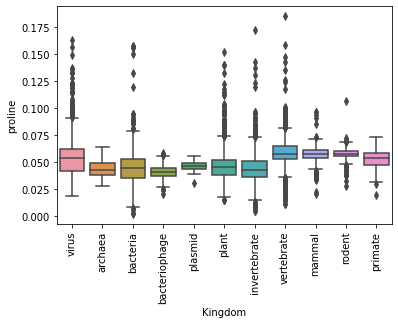

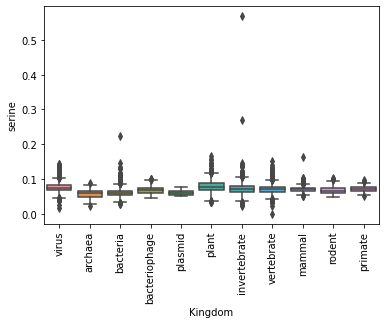

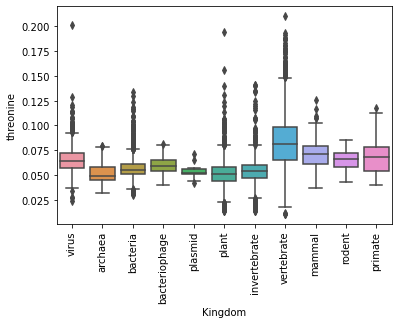

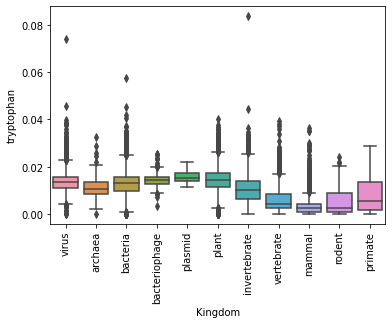

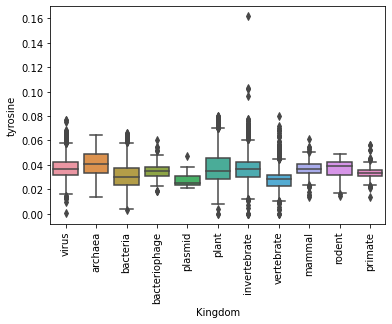

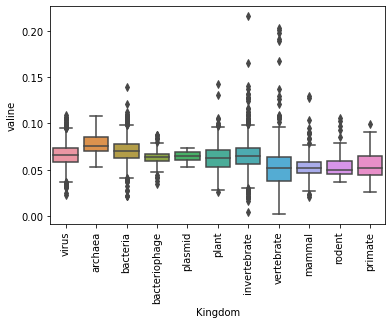

In [29]:
# not as interested in considering start and stop codons
amino_list.remove('start')
amino_list.remove('stop')

for amino in amino_list:
    ax = sns.boxplot(data=codon_usage, x='Kingdom', y=amino)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()

Perusing these results, it's difficult to characterize them other than to point out how distinct all of these boxplots are.  The amino acid distributions differ in terms of center, range, and variability.  Consider the boxplot for serine:  we have very narrow ranges from Q1 to Q3 in all kingdoms, with some outliers in each case.  There's little variability among the medians.  Comparing this with, for instance, valine, we see a much broader distribution of medians and quartiles.  
